<a href="https://colab.research.google.com/github/PraveenKumar-06/Captcha-Project-AIET-Group-6/blob/master/MNIST_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras  
from keras.datasets import mnist  
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Flatten  
from keras.layers import Conv2D, MaxPooling2D  
from keras import backend as K
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
#Loading data and setting up training parameters## 
batch_size = 128  
num_classes = 10  
epochs = 20 
# input image dimensions  
img_rows, img_cols = 28, 28    
(x_train, y_train), (x_test, y_test) = mnist.load_data()  
if K.image_data_format() == 'channels_first':  
  x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)  
  x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)  
  input_shape = (1, img_rows, img_cols)  
else:  
  x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)  
  x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)  
  input_shape = (img_rows, img_cols, 1)  
x_train = x_train.astype('float32')  
x_test = x_test.astype('float32')  
x_train /= 255  
x_test /= 255  
print('x_train shape:', x_train.shape)  
print(x_train.shape[0], 'train samples')  
print(x_test.shape[0], 'test samples')  
# convert class vectors to binary class matrices  
y_train = keras.utils.to_categorical(y_train, num_classes)  
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
#Designing the model

model = Sequential()  
model.add(Conv2D(8, kernel_size=(3, 3),  
         activation='relu',  
         input_shape=input_shape))  
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu'))  
model.add(MaxPooling2D(pool_size=(2, 2)))  #droping elements to reduce dimensionality
model.add(Flatten())  
model.add(Dense(128, activation='relu'))  
model.add(Dense(num_classes, activation='softmax'))  

W0627 10:05:28.328526 140069212206976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0627 10:05:28.367934 140069212206976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0627 10:05:28.374161 140069212206976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0627 10:05:28.401499 140069212206976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



In [0]:
#Compailing the Model
model.compile(loss=keras.losses.categorical_crossentropy,  
       optimizer=keras.optimizers.Adadelta(),  
       metrics=['accuracy'])

W0627 10:05:37.505819 140069212206976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0627 10:05:37.516093 140069212206976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



W0627 10:05:46.487495 140069212206976 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0627 10:05:46.600229 140069212206976 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 9s 152us/step - loss: 0.2744 - acc: 0.9168 - val_loss: 0.0850 - val_acc: 0.9744
Epoch 2/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0749 - acc: 0.9774 - val_loss: 0.0533 - val_acc: 0.9836
Epoch 3/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0542 - acc: 0.9832 - val_loss: 0.0462 - val_acc: 0.9852
Epoch 4/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0430 - acc: 0.9866 - val_loss: 0.0413 - val_acc: 0.9864
Epoch 5/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0357 - acc: 0.9891 - val_loss: 0.0351 - val_acc: 0.9873
Epoch 6/20
60000/60000 [==============================] - 2s 39us/step - loss: 0.0307 - acc: 0.9904 - val_loss: 0.0385 - val_acc: 0.9879
Epoch 7/20
60000/60000 [==============================] - 2s 38us/step - loss: 0.0259 - acc: 0.9919 - val_loss: 0.0306 - val_ac

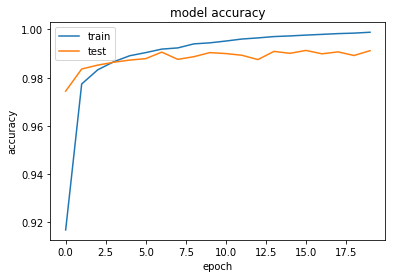

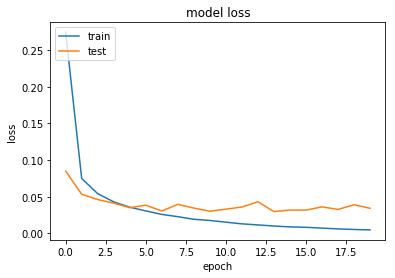

In [0]:
#Traning the Model
history = model.fit(x_train, y_train,  
     batch_size=batch_size,  
     epochs=epochs,  
     verbose=1,  
     validation_data=(x_test, y_test))  
score = model.evaluate(x_test, y_test, verbose=0)  
print('Test loss:', score[0])  
print('Test accuracy:', score[1])  
print(history.history.keys())  

plt.plot(history.history['acc'])  
plt.plot(history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()  
  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'test'], loc='upper left')  
plt.show()

9
0.99957484


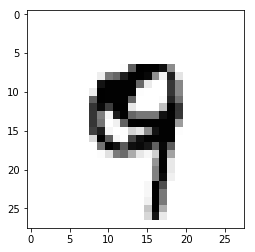

In [0]:
image_index = 4444
plt.imshow(x_test[image_index].reshape(28, 28),cmap='Greys')
pred = model.predict(x_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())
print(pred.max())

2
0.9949655


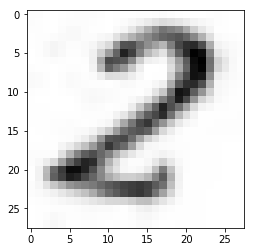

In [0]:
import cv2
import numpy as np
img = cv2.imread('crop.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img = cv2.bitwise_not(img)
img = cv2.resize(img, (28, 28))
img = np.array(img)
img = img.astype('float32')/255
img.shape
pred = model.predict(img.reshape(1,28,28,1))[0]
print(pred.argmax())
print(pred.max())
import matplotlib.pyplot as plt
plt.imshow(img,cmap='Greys')

In [0]:
import pickle 

# Save the trained model as a pickle string. 
filename = 'MNIST.sav'
pickle.dump(model, open(filename, 'wb'))